In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

# все годы
      t  - температура
      p  - давление
      ws - скорость ветра
    wdir - направление ветра

In [2]:
weather = pd.read_csv('weather.csv', index_col = ['year','month','day'])
weather.shape

(8759, 6)

# Температура

### средняя и медианная температура

In [3]:
tmean = weather[['t(day)', 't(night)']].mean().round(2)
tmedian = weather[['t(day)', 't(night)']].median().round(2)
print('среднея температура днем составляет: ', tmean.loc['t(day)'], '\u2103,', 
      ' медианная дневная температура : ', tmedian.loc['t(day)'],
     '\nсреднея температура ночью составляет: ', tmean.loc['t(night)'], '\u2103,',
     ' медианная ночная температура : ', tmedian.loc['t(night)'], sep='')

среднея температура днем составляет: 9.18℃, медианная дневная температура : 9.0
среднея температура ночью составляет: 5.78℃, медианная ночная температура : 6.0


### максимальная и минимальная температура

In [4]:
tmax = weather[['t(day)', 't(night)']].max()
tmin = weather[['t(day)', 't(night)']].min()
print('максимальная температура днем: ', tmax['t(day)'], '\u2103, ночью: ', tmax['t(night)'], '\u2103',
      '\nминимальная температура днем: ', tmin['t(day)'], '\u2103, ночью: ', tmin['t(night)'], '\u2103', sep='')

максимальная температура днем: 39℃, ночью: 33℃
минимальная температура днем: -29℃, ночью: -31℃


##### даты максимальных температур

In [5]:
tmaxdaydate = weather[weather['t(day)'] == tmax['t(day)']].index
print('максимальная температура днем была:', end=' ')
[print(i[2],'.',i[1],'.', i[0], sep='', end=' ') for i in tmaxdaydate]
tmaxnightdate = weather[weather['t(night)'] == tmax['t(night)']].index
print('\nмаксимальная температура ночью была:', end=' ')
[print(i[2],'.',i[1],'.', i[0], sep='', end=' ') for i in tmaxnightdate];

максимальная температура днем была: 29.7.2010 4.8.2010 6.8.2010 
максимальная температура ночью была: 28.7.2010 

##### даты минимальных температур

In [6]:
tmindaydate = weather[weather['t(day)'] == tmin['t(day)']].index
print('минимальная температура днем была:', end=' ')
[print(i[2],'.',i[1],'.', i[0], sep='', end=' ') for i in tmindaydate]
tminnightdate = weather[weather['t(night)'] == tmin['t(night)']].index
print('\nминимальная температура ночью была:', end=' ')
[print(i[2],'.',i[1],'.', i[0], sep='', end=' ') for i in tminnightdate];

минимальная температура днем была: 18.1.2006 
минимальная температура ночью была: 18.1.2006 

### 19. Средняя температура по годам

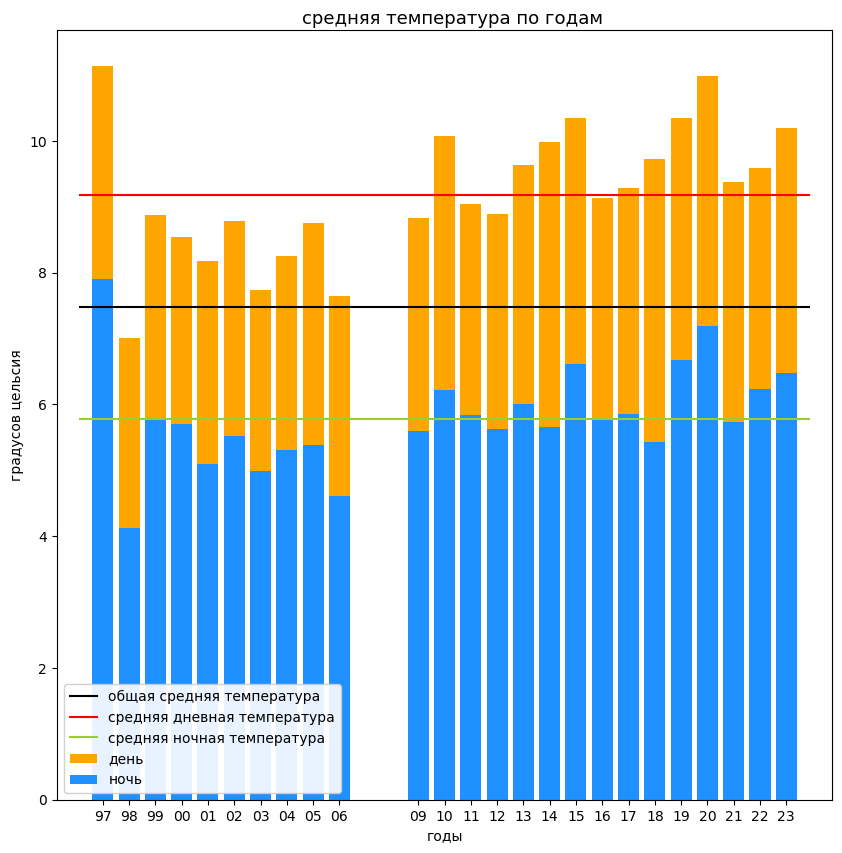

In [41]:
ytg = weather.groupby(['year']).agg({'t(day)': np.mean, 't(night)': np.mean}).round(2)
fig19 = plt.figure(figsize=(10, 10))
fig19.suptitle('средняя температура по годам',x=0.52,y=0.90, fontsize=13)
ax_ytg = fig19.add_subplot()
ax_ytg.bar(x=ytg.index.values, height=ytg['t(day)'], color='orange', label='день')
ax_ytg.bar(x=ytg.index.values, height=ytg['t(night)'], color='DodgerBlue', label='ночь')
ax_ytg.axhline(y=tmean.mean(), xmin=0.03, xmax=0.97, label='общая средняя температура', color='black')
ax_ytg.axhline(y=tmean['t(day)'], xmin=0.03, xmax=0.97, label='средняя дневная температура', color='red')
ax_ytg.axhline(y=tmean['t(night)'], xmin=0.03, xmax=0.97, label='средняя ночная температура', color='YellowGreen')
ax_ytg.xaxis.set_major_locator(FixedLocator(ytg.index))
ax_ytg.xaxis.set_major_formatter(FixedFormatter([str(i)[2:] for i in ytg.index]))
ax_ytg.set_xlabel('годы')
ax_ytg.set_ylabel('градусов цельсия')
ax_ytg.legend(loc=3, framealpha=0.9);